<a href="https://colab.research.google.com/github/Krupa-1010/Deep_Learning/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#convert MNIST images into tensor of 4dimensions(no.of images,heiht,width,channels)
transform=transforms.ToTensor()

In [4]:
#Train Data
train_data=datasets.MNIST(root='/cnn data',train=True,download=True,transform=transform)

In [5]:
#Test data
test_data=datasets.MNIST(root='/cnn data',train=False,download=True,transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
#create batch size of images
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [ ]:
#describe conv layer
conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [ ]:
#grab one MNIST data
for i ,(X_train,y_train) in enumerate(train_data):
  break

In [ ]:
X_train.shape

torch.Size([1, 28, 28])

In [ ]:
x=X_train.view(1,1,28,28) # RESHAPE TO 4 DIMENSION

In [ ]:
x=F.relu(conv1(x))

In [ ]:
#1-single image,6-filters,26*26 image size-no padding lost data change size from 28*28 to 26*26
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
#pass a pooling layer
x=F.max_pool2d(x,2,2)

In [ ]:
#26/2=13
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
#2nd convd layer
x=F.relu(conv2(x))

In [ ]:
#16=out, no padding so we loose 2 pixels around image
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x=F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

In [9]:
#Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.max_pool2d(x,2,2) # kernal -2*2 and stride 2
    # pass 2
    x=F.relu(self.conv2(x))
    x=F.max_pool2d(x,2,2) # kernal -2*2 and stride 2

    #Review to flatten it out
    x=x.view(-1,16*5*5) #-1 so we can vary batch size

    #Fully connected
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)

    return F.log_softmax(x,dim=1)



In [35]:
#create an instance of our Model
torch.manual_seed(41)
model=ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [36]:
#Loss function and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)# smaller the learning rate ,longer the time

In [37]:
import time
start_time=time.time()
#define variables
epochs=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
  trn_correct=0
  tst_corr=0

  #train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred=model(X_train)#not falttened 2d
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]#add up no of correct predictions
    batch_correct=(predicted == y_train).sum()#how many correct in a specific batch
    trn_correct+=batch_correct

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print results
    if b%600 == 0:
      print(f'epoch: {i} Batch: {b} loss={loss.item()}')


  train_losses.append(loss)
  train_correct.append(trn_correct)

  #test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted == y_test).sum()

    loss=criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time=time.time()
total=current_time-start_time
print(f'Training took :{total/60} minutes')



epoch: 0 Batch: 600 loss=0.1623610556125641
epoch: 0 Batch: 1200 loss=0.1502392590045929
epoch: 0 Batch: 1800 loss=0.4744560718536377
epoch: 0 Batch: 2400 loss=0.14238706231117249
epoch: 0 Batch: 3000 loss=0.007758188061416149
epoch: 0 Batch: 3600 loss=0.3836284875869751
epoch: 0 Batch: 4200 loss=0.0038223876617848873
epoch: 0 Batch: 4800 loss=0.0021286322735249996
epoch: 0 Batch: 5400 loss=0.0569545142352581
epoch: 0 Batch: 6000 loss=0.00038789428072050214
epoch: 1 Batch: 600 loss=0.005851339548826218
epoch: 1 Batch: 1200 loss=0.3855525553226471
epoch: 1 Batch: 1800 loss=0.004819948226213455
epoch: 1 Batch: 2400 loss=0.003216963727027178
epoch: 1 Batch: 3000 loss=0.0332382395863533
epoch: 1 Batch: 3600 loss=0.5372857451438904
epoch: 1 Batch: 4200 loss=0.04561494290828705
epoch: 1 Batch: 4800 loss=0.0007510822033509612
epoch: 1 Batch: 5400 loss=0.0001173773780465126
epoch: 1 Batch: 6000 loss=0.14201366901397705
epoch: 2 Batch: 600 loss=0.023733172565698624
epoch: 2 Batch: 1200 loss=0.0

In [38]:
for i in train_losses:
  print(i)

tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.1420, grad_fn=<NllLossBackward0>)
tensor(0.2449, grad_fn=<NllLossBackward0>)
tensor(0.0809, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)


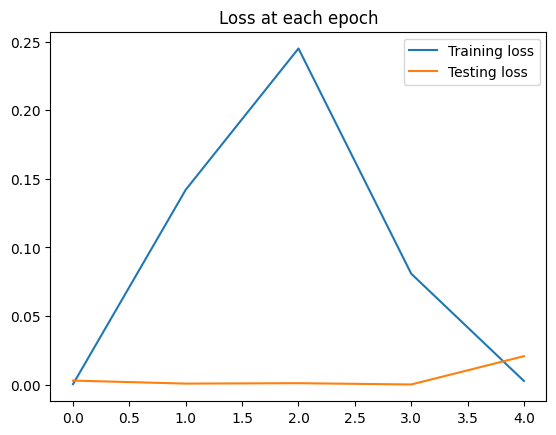

In [39]:
#grap each epoch
train_losses=[tl.item() for tl in train_losses]
plt.plot(train_losses,label="Training loss")
plt.plot(test_losses,label="Testing loss")
plt.title("Loss at each epoch")
plt.legend()
plt.show()

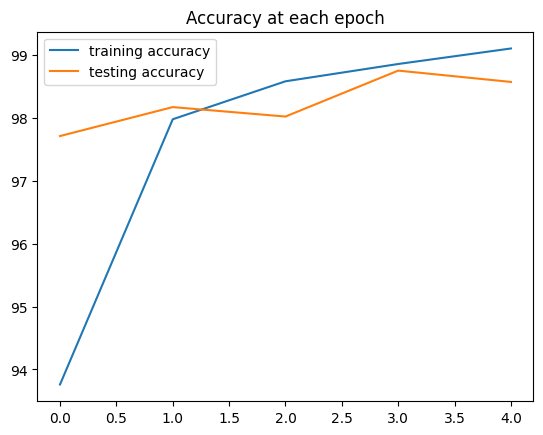

In [40]:
plt.plot([t/600 for t in train_correct],label="training accuracy")
plt.plot([t/100 for t in test_correct],label="testing accuracy")
plt.title("Accuracy at each epoch")
plt.legend()
plt.show()

In [41]:
test_load_everything=DataLoader(test_data,batch_size=10000,shuffle=False)

In [42]:
with torch.no_grad():
  correct=0
  for X_test,y_test in test_load_everything:
    y_val=model(X_test)
    predicted=torch.max(y_val.data,1)[1]
    correct+=(predicted == y_test).sum()


In [44]:
correct.item()/len(test_data)

0.9857

In [52]:
#grab an image
test_data[9146]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2392, 0.8510,
           0.9647, 0.1882, 0.0000, 0.0000, 

In [53]:
test_data[9146][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2392, 0.8510,
          0.9647, 0.1882, 0.0000, 0.0000, 0.0000, 0.0000,

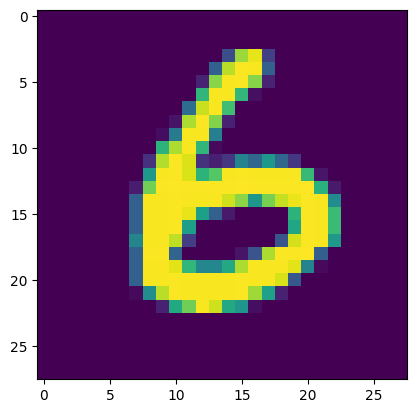

In [55]:
test_data[9146][0].reshape(28,28)
plt.imshow(test_data[9146][0].reshape(28,28))

In [56]:
model.eval()
with torch.no_grad():
  new_prediction=model(test_data[9146][0].reshape(1,1,28,28))

In [57]:
new_prediction.argmax().item()

6